# Imports des modules

In [1]:
from csv_cleaner import clean_df
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from pipeline import ML_pipeline
import numpy as np

# Imports des données, nettoyage et split entre features et target

In [2]:
df = pd.read_csv("train.csv")
train = clean_df(df)

X = train.drop('Price', axis=1)
y = train['Price']
type(X)

pandas.core.frame.DataFrame

In [3]:
svr_1 = ML_pipeline(SVR(), X, y)
svr_2 = ML_pipeline(SVR(), X, y)
svr_3 = ML_pipeline(SVR(), X, y)
svr_1.data_conversion()
svr_2.data_conversion()
svr_3.data_conversion()


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Kilometers_Driven',
                                                   'Mileage', 'Engine', 'Power',
                                                   'New_Price']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Brand', 'Location',
                                                   'Fuel_Type', 'Transmission',
                                                   'Owner_Type'])])),
                ('svr', SVR())])

# Paramètrage du Gridsearch

In [4]:
param_grid = {'svr__C' : [1],
              'svr__epsilon' : [0.1]}

svr_cv_1 = GridSearchCV(svr_1.full_pipeline, param_grid = param_grid, cv=5, scoring="neg_mean_squared_error", verbose=2)
svr_cv_2 = GridSearchCV(svr_2.full_pipeline, param_grid = param_grid, cv=5, scoring="neg_mean_squared_error", verbose=2)
svr_cv_3 = GridSearchCV(svr_3.full_pipeline, param_grid = param_grid, cv=5, scoring="neg_mean_squared_error", verbose=2)

In [5]:
svr_1.model_train_and_eval(svr_cv_1, nb_of_splits=2)
svr_2.model_train_and_eval(svr_cv_2, nb_of_splits=2)
svr_3.model_train_and_eval(svr_cv_3, nb_of_splits=2)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[CV] END .........................svr__C=1, svr__epsilon=0.1; total time=   1.1s
[CV] END .........................svr__C=1, svr__epsilon=0.1; total time=   0.7s
[CV] END .........................svr__C=1, svr__epsilon=0.1; total time=   0.6s
[CV] END .........................svr__C=1, svr__epsilon=0.1; total time=   0.6s
[CV] END .........................svr__C=1, svr__epsilon=0.1; total time=   0.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .........................svr__C=1, svr__epsilon=0.1; total time=   0.5s
[CV] END .........................svr__C=1, svr__epsilon=0.1; total time=   0.5s
[CV] END .........................svr__C=1, svr__epsilon=0.1; total time=   0.7s
[CV] END .........................svr__C=1, svr__epsilon=0.1; total time=   0.8s
[CV] END .........................svr__C=1, svr__epsilon=0.1; total time=   0.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .........................svr__C=1, svr__epsilon=0.1; total time

SVR()
Mean MSE Score : 6.31687593368761
Mean RMSE Score : 2.5119890502005964
Mean R2 Score : 0.8782113947815061
Best GridSearch parameters : {'svr__C': 1, 'svr__epsilon': 0.1}
SVR()
Mean MSE Score : 6.31687593368761
Mean RMSE Score : 2.5119890502005964
Mean R2 Score : 0.8782113947815061
Best GridSearch parameters : {'svr__C': 1, 'svr__epsilon': 0.1}
SVR()
Mean MSE Score : 6.31687593368761
Mean RMSE Score : 2.5119890502005964
Mean R2 Score : 0.8782113947815061
Best GridSearch parameters : {'svr__C': 1, 'svr__epsilon': 0.1}


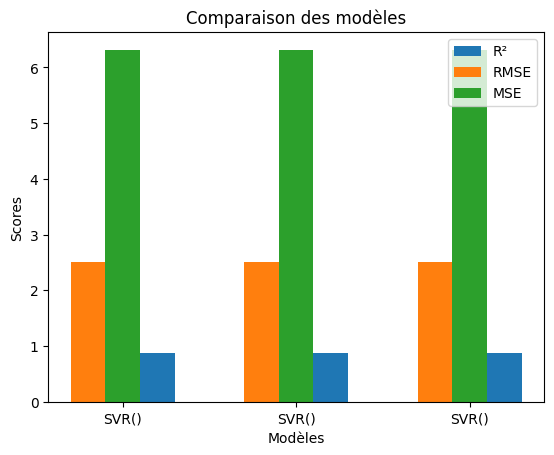

(None, [None, None, None])

In [7]:
ML_pipeline.make_graph([svr_1, svr_2, svr_3])